# Predicting Heart Disease

Approach: 
1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation


# 1. Problem Definition
- predict heart disease given clinical data about patients.
- classification

# 2. Data Understanding
- data from: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# 3. Evaluation
- goal is to reach 95% accuracy 

# 4. Features
**create data dictionary**

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

# 2. data understanding/ 3. data preperation 
- data from: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
- goal: find out more about the data
1. what questions are you trying to solve? 
2. what kind of data do we have how do we treat different types? 
3. what's missing from the data and how do you deal with it? 
4. where are the outliers and why should you care about them? 
5. how can you add change or remove features to get more out of your data? 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

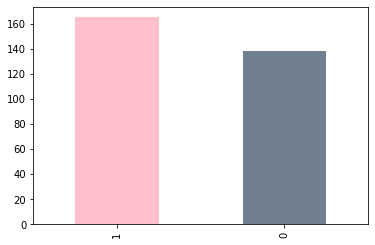

In [6]:
df["target"].value_counts().plot(kind="bar", color=["pink", "slategray"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

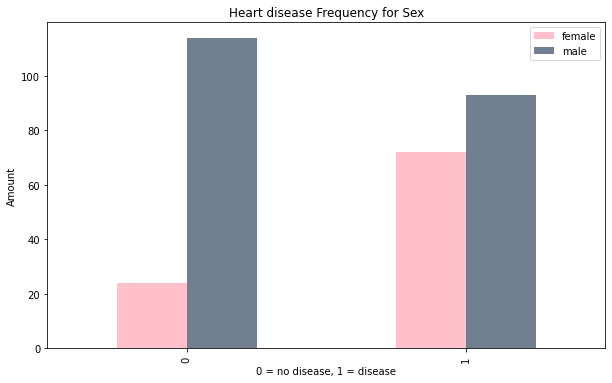

In [11]:
# compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["pink","slategray"])
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])

### age vs max heart rate for heart disease

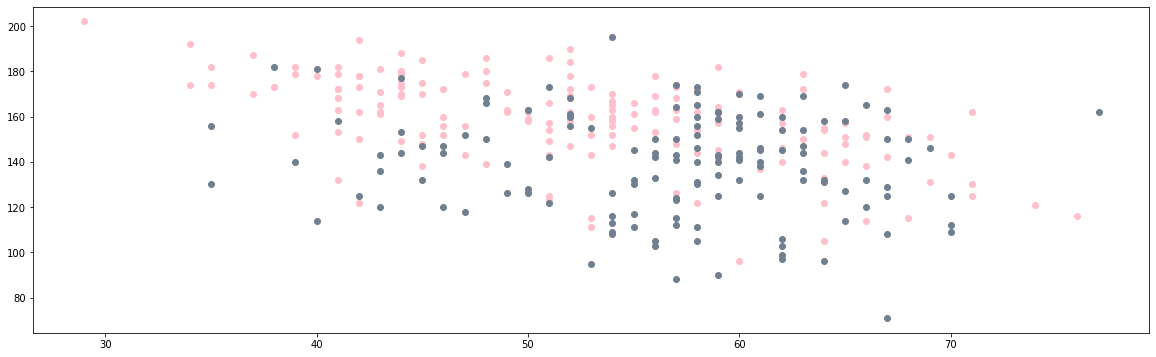

In [12]:
plt.figure(figsize=(20,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="pink")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="slategray")

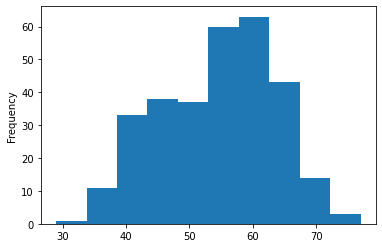

In [13]:
df.age.plot.hist();

### heart disease frequency per chest pain type

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


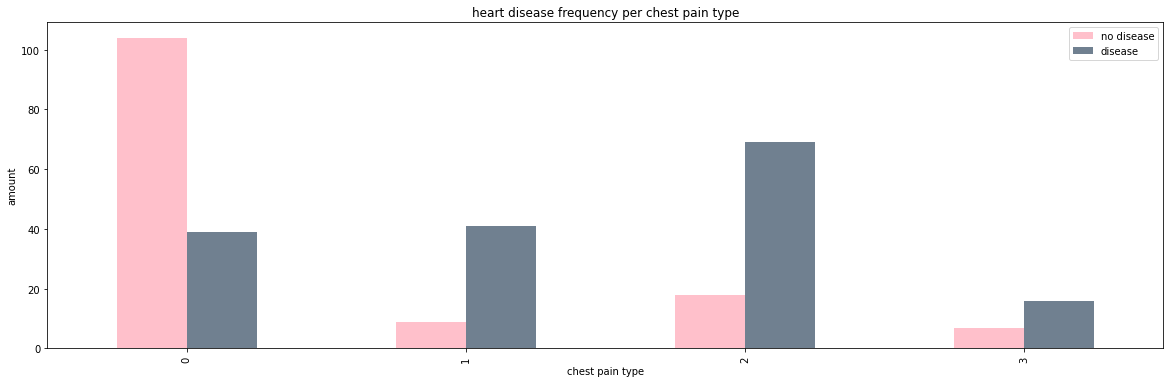

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(20,6), color=["pink", "slategray"])
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease", "disease"])


In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


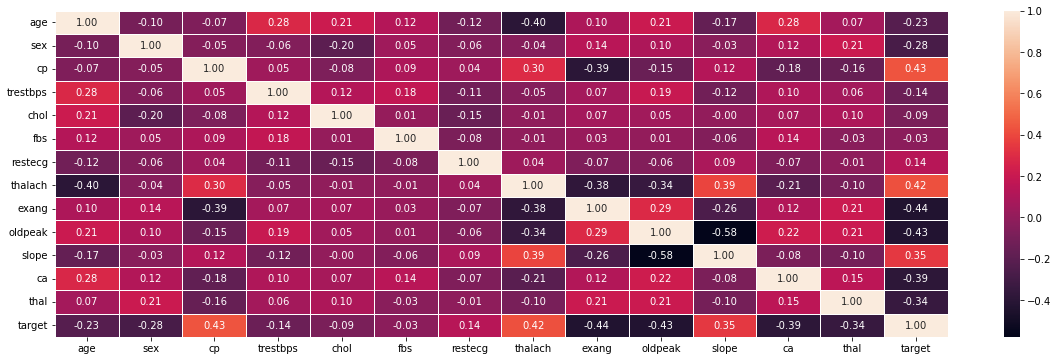

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt=".2f")

# 4. Modelling
- trying 3 models: 
    1. logistic regression (best)
    2. K-nearest neighbours calssifier
    3. random forest classifier

In [62]:
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
# TODO change this to be only one model used (best)

models={"logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(), 
       "Random Forest": RandomForestClassifier()}

def fitAndScore(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train) 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [20]:
model_scores = fitAndScore(models, X_train, X_test, y_train, y_test)
model_scores

/Users/jonathan.mecham/Desktop/c964-capstone/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### hyperparameter tuning with KNeighbors

In [21]:
#TODO could discard all this below 
train_scores = [] 
test_scores = []

neighbors = range(1,21)
knn= KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

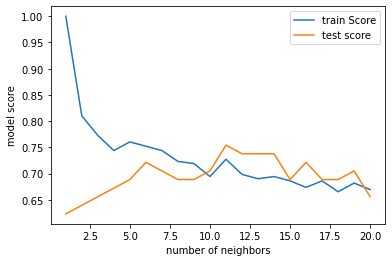

In [22]:
plt.plot(neighbors, train_scores, label="train Score")
plt.plot(neighbors, test_scores, label = "test score")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()



### hypertuning with RandomizedSearch SCV
tuning: 
- LogisticRegression()
- RandomForestClassifier()

In [23]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}



In [24]:
np.random.seed(17)
#setup
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fit
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [53]:
## tuning RFC
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
          "max_depth": [None, 3, 5, 10], 
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

np.random.seed(17)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [54]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': None}

In [55]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### hypertuning with gridsearchCV

In [56]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [57]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [58]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# 5. Evaluating

### on logistic regression

In [33]:
y_preds = gs_log_reg.predict(X_test)

/Users/jonathan.mecham/Desktop/c964-capstone/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


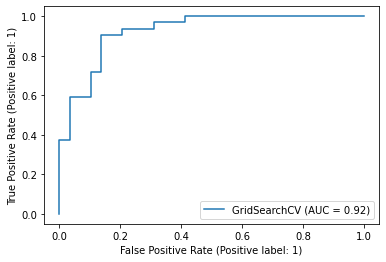

In [34]:
plot_roc_curve(gs_log_reg, X_test, y_test)

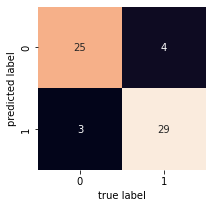

In [35]:
def plotConfMat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plotConfMat(y_test, y_preds)

In [36]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
### using cross validation
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [38]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver='liblinear')

In [39]:
#cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [40]:
# cross validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [41]:
# cross validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [42]:
# cross validated 
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<AxesSubplot:title={'center':'cross validated classification metrics'}>

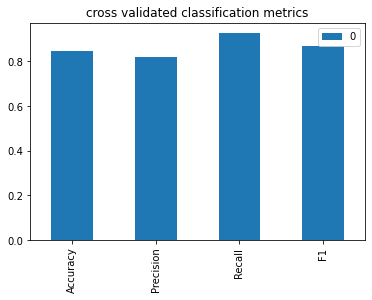

In [43]:
#visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                          index=[0])
                           
cv_metrics.T.plot.bar(title="cross validated classification metrics")

### Feature importance

which features contribute the most to the outcomes of the model

In [44]:
clf = LogisticRegression(C=0.23357214690901212,
                       solver = "liblinear")

clf.fit(X_train, y_train);

In [45]:
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

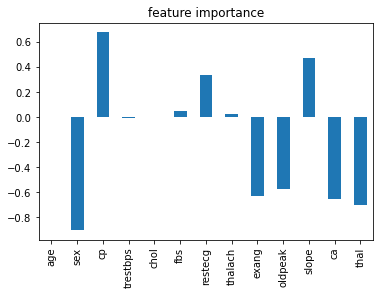

In [46]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="feature importance", legend=False);

In [47]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [48]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Deployment

### D.1 import and install dependencies

In [59]:
import pickle

pickle.dump(gs_log_reg, open("gs_log_reg.pkl", "wb"))

In [60]:
loaded_model= pickle.load(open("gs_log_reg.pkl", "rb"))